<a href="https://colab.research.google.com/github/Rneron/Teste/blob/main/Case_EJEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando as bibliotecas que iremos utilizar para análises gráficas e manipulação da base de dados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 


In [ ]:
# Importando a base da dados e definindo as variáveis 
dados =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tabelas/2019.csv')
dados = dados.rename(columns={'Overall rank':'Ranking','Country or region':'Country'})


In [ ]:
dados.head()

,Ranking,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
dados.describe()

,Ranking,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


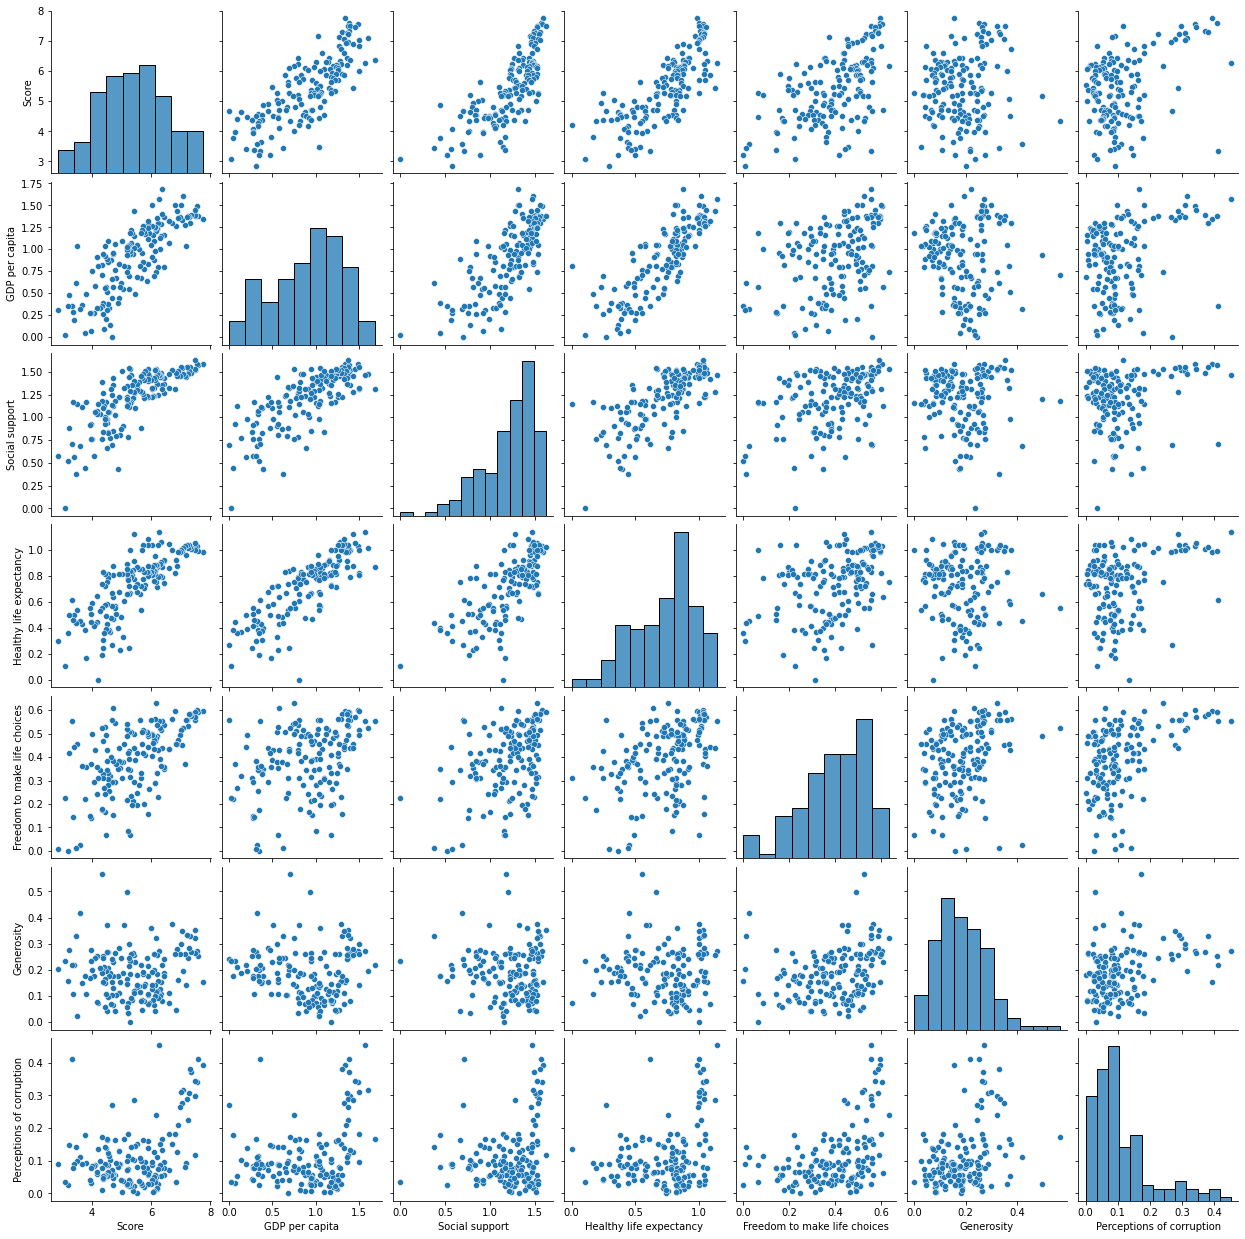

In [ ]:
df = dados.drop(columns= 'Ranking') # importante para verificar as correlações
sns.pairplot(df) # Gráficos de correlações 


<AxesSubplot:>

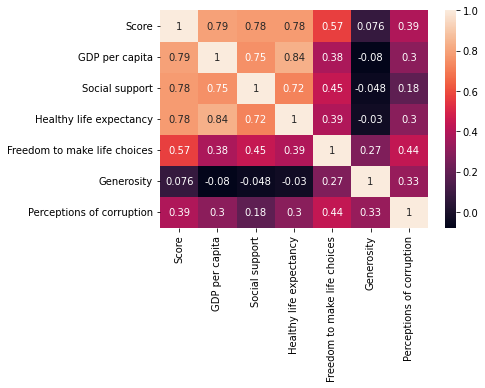

In [ ]:
correlacoes = df.corr()
sns.heatmap(correlacoes, annot = True) # Mapa de calor 

In [ ]:
import scipy.stats as stats

In [ ]:
stats.shapiro(dados['GDP per capita']) # PIB não possui dados normais

ShapiroResult(statistic=0.9652916193008423, pvalue=0.0005822081584483385)

In [ ]:
stats.shapiro(dados['Score'])

ShapiroResult(statistic=0.9872013330459595, pvalue=0.16326695680618286)

In [ ]:
stats.shapiro(dados['Social support'])

ShapiroResult(statistic=0.9073690176010132, pvalue=2.1574608766172787e-08)

In [ ]:
stats.shapiro(dados['Healthy life expectancy'])

ShapiroResult(statistic=0.9534119367599487, pvalue=4.4985165004618466e-05)

In [ ]:
stats.shapiro(dados['Freedom to make life choices'])

ShapiroResult(statistic=0.954298734664917, pvalue=5.386187694966793e-05)

<ipython-input-13-c2196ade6b0f>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dados.drop(columns='Ranking').hist(bins=20, color='steelblue', edgecolor='black', linewidth=1.0,


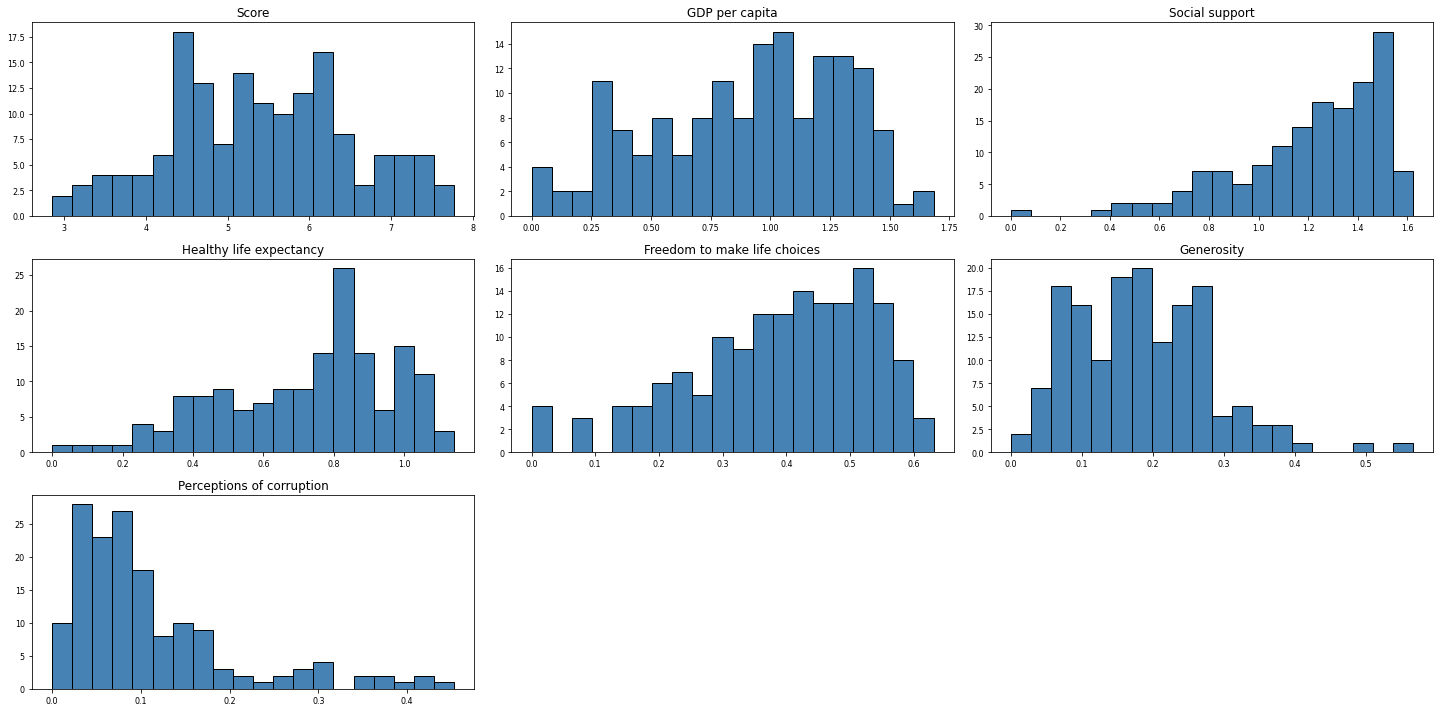

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

dados.drop(columns='Ranking').hist(bins=20, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False, ax=ax)    
plt.tight_layout() 
plt.show()


In [ ]:
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression

In [ ]:
score = dados['Score']
pib = dados['GDP per capita']
expec = dados['Healthy life expectancy']
sup = dados['Social support']
lib= dados['Freedom to make life choices']

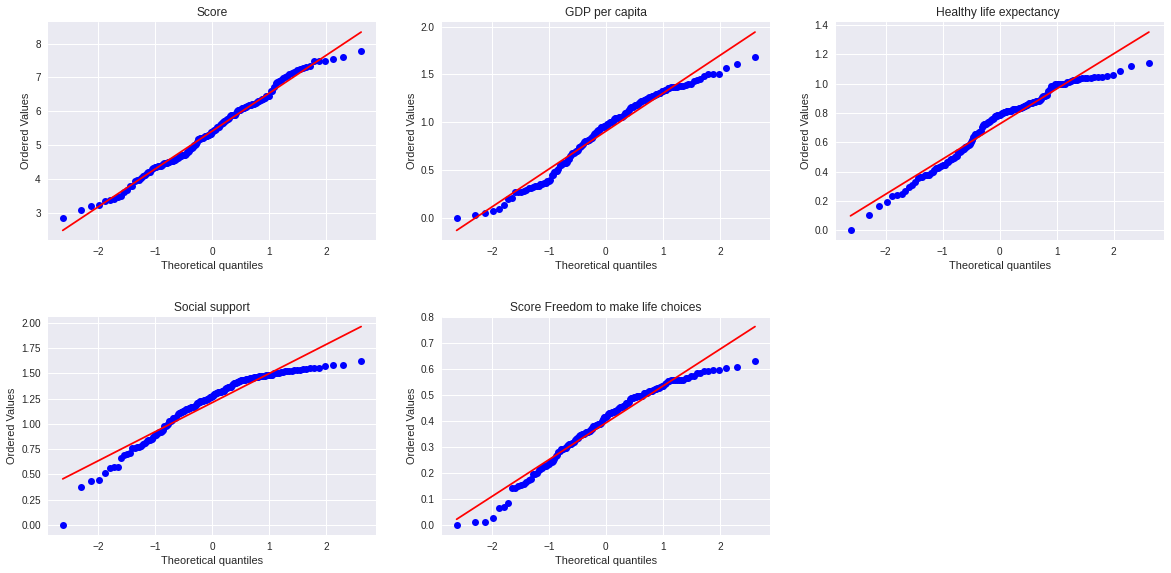

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize = ((20,8)))
plt.subplot(2,3,1)
stats.probplot(score, dist="norm", plot=plt)
plt.title('Score')

plt.subplot(2,3,2)
stats.probplot(pib, dist="norm", plot=plt)
plt.title('GDP per capita')

plt.subplot(2,3,3)
stats.probplot(expec, dist="norm", plot=plt)
plt.title('Healthy life expectancy ')

plt.subplot(2,3,4)
stats.probplot(sup, dist="norm", plot=plt)
plt.title('Social support')

plt.subplot(2,3,5)
stats.probplot(lib, dist="norm", plot=plt)
plt.title('Score Freedom to make life choices')

plt.subplots_adjust(left=0.125, bottom=0.01, right=0.9, top=0.9, wspace=0.2, hspace=0.35)

plt.show()

<AxesSubplot:>

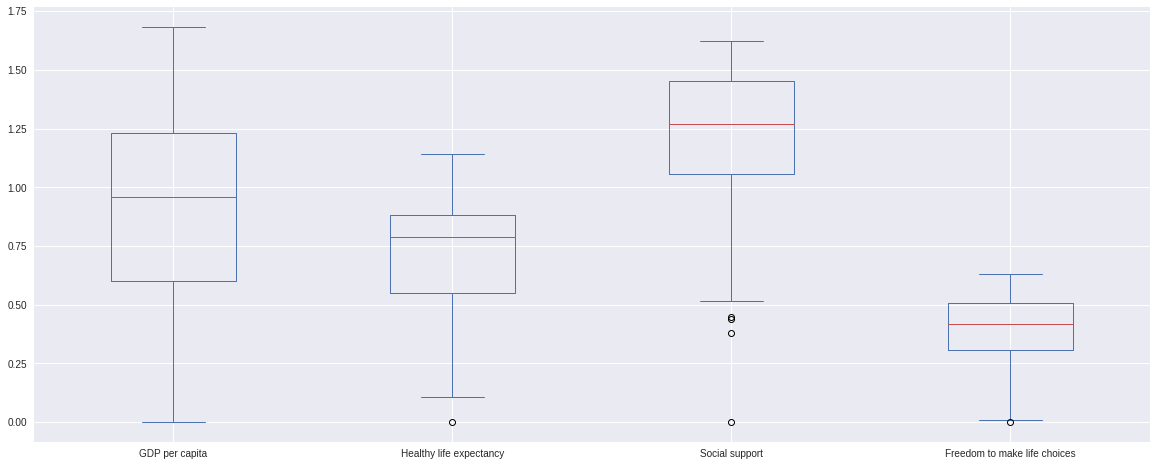

In [ ]:
dados[['GDP per capita','Healthy life expectancy','Social support','Freedom to make life choices']].plot.box(figsize=(20,8))

In [ ]:
# Criando as variáveis independentes X e dependente Y
x1 = dados.iloc[:, 3].values
x1 = x1.reshape(-1, 1)

x2 = dados.iloc[:, 4].values
x2 = x2.reshape(-1, 1)

x3 = dados.iloc[:, 5].values
x3 = x3.reshape(-1, 1)

x4 = dados.iloc[:, 6].values
x4 = x4.reshape(-1, 1)

y = dados.iloc[:, 2].values

In [ ]:
# Criando os modelos para comparação
modelo1 = sm.ols(formula='score ~ pib',data = dados).fit()
modelo2 = sm.ols(formula='score ~ pib + expec ',data = dados).fit()
modelo3 = sm.ols(formula='score ~ pib + expec + sup ',data = dados).fit()
modelo4 = sm.ols(formula='score ~ pib + expec + sup + lib ',data = dados).fit()

In [ ]:
print(modelo1.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     262.5
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           4.32e-35
Time:                        17:27:08   Log-Likelihood:                -159.97
No. Observations:                 156   AIC:                             323.9
Df Residuals:                     154   BIC:                             330.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3993      0.135     25.120      0.0

In [ ]:
print(modelo2.summary())  

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     159.1
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           4.26e-38
Time:                        17:27:08   Log-Likelihood:                -149.84
No. Observations:                 156   AIC:                             305.7
Df Residuals:                     153   BIC:                             314.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9277      0.163     17.928      0.0

In [ ]:
print(modelo3.summary()) # MELHOR MODELO

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     134.5
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           1.43e-42
Time:                        17:27:08   Log-Likelihood:                -136.50
No. Observations:                 156   AIC:                             281.0
Df Residuals:                     152   BIC:                             293.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1350      0.212     10.088      0.0

In [ ]:
print(modelo4.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     127.0
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           2.82e-47
Time:                        17:27:08   Log-Likelihood:                -122.62
No. Observations:                 156   AIC:                             255.2
Df Residuals:                     151   BIC:                             270.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8921      0.199      9.491      0.0

In [ ]:
dados.head()

,Ranking,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


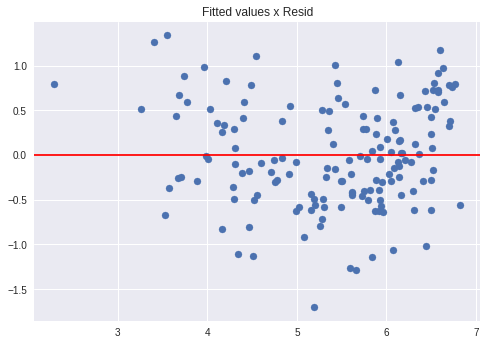

In [ ]:
# ANALISANDO OS RESULTADOS CHEGAMOS A CONCLUSÃO QUE O MELHOR MODELO É O MODELO 3
# Visualizar gráfico com os residuais
plt.scatter(x=modelo3.fittedvalues,y=modelo3.resid)
plt.axhline(color='red',)
plt.title('Fitted values x Resid')
plt.show()


<AxesSubplot:ylabel='Count'>

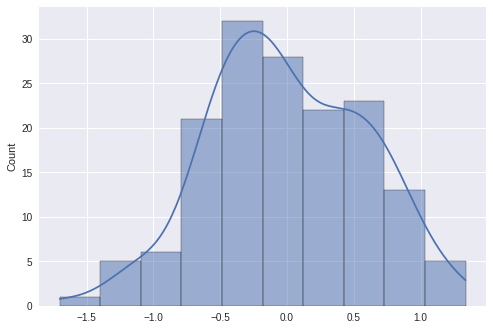

In [ ]:
sns.histplot(modelo3.resid,kde=True)

In [ ]:
stats.shapiro(modelo3.resid)

ShapiroResult(statistic=0.9892755150794983, pvalue=0.2811422049999237)